## Check List 7.1. Demo - White board sweeping
* In this demo file, we will use two robots (Indy7, Panda) to sweep a white board, removing obstacles

* You need trained model to use ReachChecker
  - model/reach_svm/indy7.json
  - model/reach_svm/panda.json
  - 백업: 개인 이동식 하드디스크, 강준수

### Prepare the task scene
* Prepare Indy7 and panda, and install sweeping tool to indy. (Check release/Figs/7.1.WhiteBoardSweeping.jpg)
* Prepare "floor", "track", "box1", "box2" objects as defined in pkg.detector.aruco.marker_config.py
* The robots and "track" are installed on "floor".
* "box1" and "box2" are on "track"
<img src="../Figs/7.1.WhiteBoardSweeping.jpg" width="80%">

## set running directory to project source

In [1]:
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))
from pkg.utils.code_scraps import add_indy_sweep_tool, \
        use_current_place_point_only, use_current_sub_binders_only, \
        finish_L_shape, set_l_shape_object, ModeSwitcher, double_sweep_motions

## init combined robot config

In [2]:
from pkg.controller.combined_robot import *
from pkg.project_config import *

crob = CombinedRobot(robots_on_scene=[
    RobotConfig(0, RobotType.indy7, ((0.3,-0.4,0), (0,0,np.pi/2)),
                INDY_IP),
    RobotConfig(1, RobotType.panda, ((-0.3,-0.4,0), (0,0,np.pi/2)),
                "{}/{}".format(PANDA_REPEATER_IP, PANDA_ROBOT_IP))]
              , connection_list=[False, False])

connection command:
indy0: False
panda1: False


In [3]:
from pkg.detector.aruco.marker_config import *
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.camera.realsense import RealSense
from pkg.detector.camera.kinect import Kinect
aruco_map = get_aruco_map()
stereo = ArucoStereo(aruco_map, [Kinect(), RealSense()])
stereo.initialize()
stereo.calibrate()

Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.


Start streaming


[(array([[1.82983423e+03, 0.00000000e+00, 1.91572046e+03],
         [0.00000000e+00, 1.82983423e+03, 1.09876086e+03],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  array([ 7.09966481e-01, -2.73409390e+00,  1.45804870e-03, -3.24774766e-04,
          1.44911301e+00,  5.84310412e-01, -2.56374550e+00,  1.38472950e+00])),
 (array([[1.39560388e+03, 0.00000000e+00, 9.62751587e+02],
         [0.00000000e+00, 1.39531934e+03, 5.47687012e+02],
         [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
  array([0., 0., 0., 0., 0.])),
 array([[ 0.8264555 , -0.0271878 , -0.56234527,  0.6483587 ],
        [ 0.17571424,  0.96139616,  0.21175912, -0.15993649],
        [ 0.5348793 , -0.27382156,  0.7993284 ,  0.0893375 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],
       dtype=float32)]

## create scene builder

In [4]:
from pkg.geometry.builder.scene_builder import SceneBuilder
s_builder = SceneBuilder(stereo)
s_builder.reset_reference_coord(ref_name="floor")

## detect robot and make geometry scene

In [5]:
# xyz_rpy_robots = s_builder.detect_items(level_mask=[DetectionLevel.ROBOT])
xyz_rpy_robots = {
    'indy0': (
        [-0.333421528339386, 0.24772846698760986, 0.014830708503723145],
        [-0.0022495811513239244, 0.009386494600278107, -1.5798803714430598]),
    'panda1': (
        [0.5241100788116455, 0.17634934186935425, 0.0176389217376709],
        [-0.00026396008394682035, 0.005587422053576676, -1.593019468410638])}

In [6]:
crob.update_robot_pos_dict(xyz_rpy_robots=xyz_rpy_robots)
gscene = s_builder.create_gscene(crob)

Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran0']/actuator[@name='indy0_motor0']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran1']/actuator[@name='indy0_motor1']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran2']/actuator[@name='indy0_motor2']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran3']/actuator[@name='indy0_motor3']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran4']/actuator[@name='indy0_motor4']
Unknown tag "hardwareInterface" in /robot[@name='custom_robots']/transmission[@name='indy0_tran5']/actuator[@name='indy0_motor5']


Please create a subscriber to the marker
publication OK
published: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## init planning pipeline

In [7]:
from pkg.planning.scene import PlanningScene
pscene = PlanningScene(gscene, combined_robot=crob)

from pkg.planning.pipeline import PlanningPipeline
ppline = PlanningPipeline(pscene)

from pkg.ui.ui_broker import *

# start UI
ui_broker = UIBroker.instance()
ui_broker.initialize(ppline, s_builder)
ui_broker.start_server()

ui_broker.set_tables()

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "pkg.ui.dash_launcher" (lazy loading)


```
open web ui on <your ip>:8050
click geometry items / Handles / Binders to highlight geometry on RVIZ
other functions may be buggy.. please report
```

## add environment

In [8]:
gtem_dict = s_builder.detect_and_register(level_mask=[DetectionLevel.ENVIRONMENT])

# add cam poles
ptems = s_builder.add_poles({"cam0": s_builder.ref_coord_inv[:3,3], "cam1":np.matmul(s_builder.ref_coord_inv, stereo.T_c12)[:3,3]},
                            color=(0.6,0.6,0.6,0.0))
gtems = s_builder.add_robot_geometries(color=(0,1,0,0.5), display=True, collision=True)
gscene.NAME_DICT["floor"].dims = (2,1,0.01)
gscene.set_workspace_boundary( -1, 1, -0.5, 0.5, -0.1, 1.05)

 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
Please create a subscriber to the marker


## add indy tool

In [9]:
add_indy_sweep_tool(gscene, "indy0", face_name="brush_face")

## add sweep face

In [10]:
track = s_builder.detect_and_register(item_names=["track"], level_mask=[DetectionLevel.ENVIRONMENT])["track"]
track_face = gscene.copy_from(track, new_name="track_face", collision=False)
track_face.dims = (track.dims[0]-0.1, track.dims[1]-0.1, track.dims[2])
# track.dims = (track.dims[0]-0.32, track.dims[1]-0.12, track.dims[2])
gscene.update_markers_all()

## add wp

In [11]:
TOOL_DIM = [0.06, 0.1]
TACK_WIDTH = 0.17
TRACK_DIM = track_face.dims
TRACK_NUM = np.ceil(np.divide(TRACK_DIM[1]-TOOL_DIM[1], TOOL_DIM[1]+1e-6)).astype(np.int)+1
TRACK_STEP = (TRACK_DIM[1]-TOOL_DIM[1])/(TRACK_NUM-1)
WP_REF_A = -np.subtract(TRACK_DIM[:2], TOOL_DIM[:2])/2
WP_REF_B = np.array([-WP_REF_A[0], WP_REF_A[1]])
WP_REF_M = np.array([0, WP_REF_A[1]])
TRC_THIC = TRACK_DIM[2]
COL_HEIGHT = 0.05
track_list = []
for i_trc in range(TRACK_NUM):
    wp1 = gscene.create_safe(GEOTYPE.BOX, "wp{}a".format(i_trc+1), "base_link", (TOOL_DIM[0]/2,TOOL_DIM[1]/2,TRC_THIC), 
                             tuple(WP_REF_A+[0,TRACK_STEP*i_trc])+(0,),rpy=(0,0,0), 
                             color=(0.8,0.2,0.2,0.2), display=True, fixed=True, collision=False, parent="track_face")
    wp2 = gscene.create_safe(GEOTYPE.BOX, "wp{}b".format(i_trc+1), "base_link", (TOOL_DIM[0]/2,TOOL_DIM[1]/2,TRC_THIC), 
                             tuple(WP_REF_B+[0,TRACK_STEP*i_trc])+(0,),rpy=(0,0,0), 
                             color=(0.8,0.2,0.2,0.2), display=True, fixed=True, collision=False, parent="track_face")
    face = gscene.create_safe(GEOTYPE.BOX, "face{}".format(i_trc+1), "base_link", 
                              (TRACK_DIM[0] - TOOL_DIM[0]/2,TACK_WIDTH,COL_HEIGHT), 
                             center=tuple(WP_REF_M+[0,TRACK_STEP*i_trc])+(COL_HEIGHT/2,),rpy=(0,0,0), 
                             color=(0.8,0.2,0.2,0.2), display=True, fixed=True, collision=False, parent="track_face")
    track_list.append((wp1, wp2, face))

In [12]:
gscene.update_markers_all()

## add blocking structure on table

In [13]:
# gscene.create_safe(gtype=GEOTYPE.BOX, name="blocker", link_name="base_link",
#                             center=(-0.27,-0.2,0.15), dims=(0.1,0.3, 0.4), rpy=(0,0,0), color=(0.0,0.8,0.0,0.5),
#                             collision=True, fixed=True)

## add box

In [14]:
gtem_dict = s_builder.detect_and_register(level_mask=[DetectionLevel.MOVABLE])

In [15]:
gscene.update_markers_all()

## Register binders

In [16]:
from pkg.planning.constraint.constraint_actor import Gripper2Tool, PlacePlane, SweepFramer, FixtureSlot

In [17]:
gscene.create_safe(gtype=GEOTYPE.SPHERE, name="grip1", link_name="panda1_hand", 
                 dims=(0.01,)*3, center=(0,0,0.112), rpy=(-np.pi/2,0,0), color=(1,0,0,1), display=True, collision=False, fixed=True)

pscene.create_binder(bname="grip1", gname="grip1", _type=Gripper2Tool, point=(0,0,0), rpy=(0,0,0))
pscene.create_binder(bname="brush_face", gname="brush_face", _type=SweepFramer, point=(0,0,gscene.NAME_DICT['brush_face'].dims[2]/2), 
                     rpy=(0,np.pi,0))
pscene.create_binder(bname="track_face", gname="track_face", _type=PlacePlane)

## add objects

In [18]:
from pkg.planning.constraint.constraint_subject import \
        CustomObject, Grasp2Point, PlacePoint, SweepFrame, SweepTask, BoxObject, FixturePoint, AbstractObject

In [19]:
for gname in sorted(gtem_dict.keys()):
    pscene.create_subject(oname=gname, gname=gname, _type=BoxObject, hexahedral=True)
# box3= pscene.create_subject(oname="box3", gname="box3", _type=BoxObject, hexahedral=True)

In [20]:
from pkg.planning.constraint.constraint_common import MotionConstraint
from pkg.planning.constraint.constraint_subject import AbstractTask
from pkg.planning.constraint.constraint_subject import SweepLineTask

In [21]:
# sweep_list = []
# for i_t, track_tem in enumerate(track_list):
#     wp1, wp2, face = track_tem
#     sweep_ = pscene.create_subject(oname="sweep{}".format(i_t+1), gname="track_face", _type=SweepLineTask, 
#                                    action_points_dict = {wp1.name: SweepFrame(wp1.name, wp1, [0,0,0.005], [0,0,0]),
#                                                        wp2.name: SweepFrame(wp2.name, wp2, [0,0,0.005], [0,0,0])}, 
#                                    clearance=[face])
#     sweep_list.append(sweep_)

### planners

In [22]:
from pkg.planning.motion.moveit.moveit_planner import MoveitPlanner
mplan = MoveitPlanner(pscene)
mplan.update_gscene()
from pkg.planning.task.rrt import TaskRRT
tplan = TaskRRT(pscene)
tplan.prepare()
ppline.set_motion_planner(mplan)
ppline.set_task_planner(tplan)

## motion filters

In [23]:
from pkg.planning.filtering.grasp_filter import GraspChecker
from pkg.planning.filtering.reach_filter import ReachChecker
from pkg.planning.filtering.latticized_filter import LatticedChecker
from pkg.planning.filtering.task_clearance_filter import TaskClearanceChecker

gcheck = GraspChecker(pscene)
rcheck = ReachChecker(pscene)
tcheck = TaskClearanceChecker(pscene, gcheck)
checkers_all = [tcheck, rcheck, gcheck]
# lcheck = LatticedChecker(pscene, gcheck)
# checkers_all.append(lcheck)

In [24]:
mplan.motion_filters = checkers_all

In [25]:
gscene.show_pose(crob.home_pose)

## Set initial condition

In [26]:
from pkg.planning.constraint.constraint_common \
            import sample_redundancy, combine_redundancy
gtimer = GlobalTimer.instance()
initial_state = pscene.initialize_state(crob.home_pose)
print(initial_state.node)

# remove place points except for the current one
use_current_place_point_only(pscene, initial_state)

('track_face', 'track_face', 'track_face')


In [27]:
pscene.subject_name_list

['box2', 'box3', 'long_1']

## Plan & show

In [28]:
from pkg.utils.code_scraps import clear_tasks, set_single_sweep_line, calc_schedule_time
from pkg.planning.constraint.constraint_common import get_binding_margins, fit_binding
from pkg.utils.traj_utils import simplify_schedule, mix_schedule
mplan.reset_log(False)
gtimer.reset()

In [29]:
mplan.reset_log(False)
gtimer.reset()

with gtimer.block("detect"):
    for sname in pscene.subject_name_list:
        if isinstance(pscene.subject_dict[sname], AbstractObject):
            pscene.remove_subject(sname)
            
    gscene.clear_non_fixed()
    
    ## detect again
    gtem_dict = s_builder.detect_and_register(level_mask=[DetectionLevel.MOVABLE])

    ## create boxes
    box_list =  [] 
    for gname in sorted(gtem_dict.keys()):
        with gtimer.block(gname):
            box_new = pscene.create_subject(oname=gname, gname=gname, _type=BoxObject, hexahedral=True)
            box_new.register_binders(pscene, PlacePlane)
            box_list.append(box_new)
            
initial_state = pscene.initialize_state(crob.home_pose, force_fit_binding=False)
gscene.update_markers_all()

# remove place points and sub-binders except for the current ones
use_current_place_point_only(pscene, initial_state)
use_current_sub_binders_only(pscene, initial_state)
tplan.prepare()
mplan.update_gscene()

In [30]:
print(gtimer)

detect: 	328.4 ms/1 = 328.4 ms (328.422/328.422)
box2: 	2.9 ms/1 = 2.9 ms (2.866/2.866)
box3: 	2.5 ms/1 = 2.5 ms (2.47/2.47)



In [31]:
mplan.reset_log(False)
gtimer.reset(1, timeunit="s")

with gtimer.block("detect"):
    for sname in pscene.subject_name_list:
        if isinstance(pscene.subject_dict[sname], AbstractObject):
            pscene.remove_subject(sname)
            
    gscene.clear_non_fixed()
    
    ## detect again
    gtem_dict = s_builder.detect_and_register(level_mask=[DetectionLevel.MOVABLE])

    ## create boxes
    box_list =  [] 
    for gname in sorted(gtem_dict.keys()):
        box_new = pscene.create_subject(oname=gname, gname=gname, _type=BoxObject, hexahedral=True)
        box_new.register_binders(pscene, PlacePlane)
        box_list.append(box_new)
    
with gtimer.block("scene_init"):
    clear_tasks(pscene)
    initial_state = pscene.initialize_state(crob.home_pose, force_fit_binding=True)
    gscene.update_markers_all()

    # remove place points and sub-binders except for the current ones
    use_current_place_point_only(pscene, initial_state)
    use_current_sub_binders_only(pscene, initial_state)
    
print(initial_state.node)

gtimer.tic("firstmove")
obj_num = len(gtem_dict)
sweep_num = len(track_list)
current_state = initial_state
t_exe = None
dt_step = 2e-2
snode_schedule_all = []
for sweep_idx in range(3):
    # set current track
    set_single_sweep_line(pscene, sweep_idx, *track_list[sweep_idx])
    # ban current putting on current track's clearance area
    gcheck.put_banned = [track_list[sweep_idx][2]]
    
    tplan.prepare(random_homing=True)
    mplan.update_gscene()
    from_state = pscene.initialize_state(current_state.Q, force_fit_binding=True)
    sweep_goal = (2,)
#     sweep_goal = tuple([int(i_s<=sweep_idx)*2 for i_s in range(2)])+(0,)
    goal_nodes = [("track_face",)*obj_num+sweep_goal]
    if sweep_idx < sweep_num-1:
        for i_s in range(obj_num):
            obj_goal = ["track_face"]*obj_num
            obj_goal[i_s] = "grip1"
            goal_nodes += [tuple(obj_goal)+sweep_goal]
    gtimer.tic("plan{}".format(sweep_idx))
    ppline.search(from_state, goal_nodes, verbose=False, display=False, dt_vis=0.01, 
                  timeout_loop=100, multiprocess=False, timeout=1, timeout_constrained=2, add_homing=True, post_optimize=False)
    gtimer.toc("plan{}".format(sweep_idx))
    schedules = ppline.tplan.find_schedules(False)
    schedules_sorted = ppline.tplan.sort_schedule(schedules)
    snode_schedule = ppline.tplan.idxSchedule2SnodeScedule(schedules_sorted[0])
    snode_schedule_ori = snode_schedule
    snode_schedule_simple = simplify_schedule(pscene, snode_schedule)
    snode_schedule_safe = calculate_safe_schedule(pscene, snode_schedule_simple, 0.5, 1, dt_step=dt_step)
#     double_sweep_motions(snode_schedule_safe)
    snode_schedule = snode_schedule_safe # no mix
#     snode_schedule = mix_schedule(mplan, snode_schedule_safe) # mix
    current_state = snode_schedule[-1].state
    if t_exe:
        t_exe.join()
    else:
        if len(snode_schedule_all)==0:
            gtimer.toc("firstmove")
    snode_schedule_all.append(snode_schedule)
    ppline.play_schedule(snode_schedule, period=0.001)
#     t_exe = Thread(target=ppline.play_schedule, args = (snode_schedule,), kwargs=dict( period=0.01))
#     t_exe.start()
# t_exe.join()

('track_face', 'track_face', 'track_face')
transition motion tried: False
++ adding return motion to acquired answer ++
======================= terminated 0: first answer acquired ===============================
('track_face', 'track_face', 'track_face', 0)->('track_face', 'track_face', 'track_face', 0)
('track_face', 'track_face', 'track_face', 0)->('grip1', 'track_face', 'track_face', 0)
('grip1', 'track_face', 'track_face', 0)->('grip1', 'track_face', 'track_face', 0)
('grip1', 'track_face', 'track_face', 0)->('track_face', 'track_face', 'track_face', 0)
('track_face', 'track_face', 'track_face', 0)->('track_face', 'track_face', 'track_face', 0)
('track_face', 'track_face', 'track_face', 0)->('track_face', 'track_face', 'grip1', 0)
('track_face', 'track_face', 'grip1', 0)->('track_face', 'track_face', 'grip1', 0)
('track_face', 'track_face', 'grip1', 0)->('track_face', 'track_face', 'grip1', 1)
('track_face', 'track_face', 'grip1', 1)->('track_face', 'track_face', 'grip1', 2)
('trac

In [32]:
print(gtimer)

for i_ss, snode_schedule in enumerate(snode_schedule_all):
    print("line {} - {} s" .format(i_ss, np.round(calc_schedule_time(dt_step=dt_step, snode_schedule=snode_schedule), 2)))

detect: 	0.3 s/1 = 0.3 s (0.316/0.316)
scene_init: 	0.1 s/1 = 0.1 s (0.099/0.099)
firstmove: 	7.3 s/1 = 7.3 s (7.27/7.27)
plan0: 	6.8 s/1 = 6.8 s (6.83/6.83)
initialize_memory: 	0.0 s/3 = 0.0 s (0.0/0.0)
init_search: 	0.0 s/3 = 0.0 s (0.0/0.0)
test_connection: 	38.8 s/1783 = 0.0 s (0.001/1.112)
plan1: 	21.4 s/1 = 21.4 s (21.386/21.386)
plan2: 	12.1 s/1 = 12.1 s (12.113/12.113)

line 0 - 42.78 s
line 1 - 55.3 s
line 2 - 70.22 s


* 남은 문제:
    * 긴 물체 놓을 공간 문제 어떻게 해결?

* tried: False 로 검색해서 실패 찾기
* Fail case 1: 뒤집어진 관절각으로 constrained motion 불가능한 케이스 -> 체크 후 폐기로 해결? 하려면 constrained motion 성공률 높여야.
* Fail case 2: constrained motion, 그냥?
* 처음 시도는 잘 되는 거 같기도?

In [ ]:
# ppline.play_schedule(snode_schedule, period=0.001)

In [ ]:
# for i_ss, snode_schedule in enumerate(snode_schedule_all):
#     for i_s, snode in enumerate(snode_schedule):
#         if snode.traj is not None:
#             save_json("data/traj_{}_{}.json".format(i_ss, i_s), snode.traj[:,:6])

## Plan & execute

In [31]:
import matplotlib.pyplot as plt
from pkg.utils.code_scraps import ModeSwitcherForceLog
msfl = ModeSwitcherForceLog(pscene, log_force=True)
kinect = stereo.camera_list[0]
imageset_list = []
force_log_list = []

In [32]:
force_log_list = load_pickle("force_log_list.pkl")
imageset_list = load_pickle("imageset_list.pkl")

In [33]:
from pkg.planning.constraint.constraint_common import get_binding_margins, fit_binding
crob.reset_connection(True,True)

connection command:
indy0: True
panda1: True
Connect: Server IP (192.168.0.63)


In [35]:
indy = crob.robot_dict['indy0']

In [36]:
indy.stop_tracking()

Connect: Server IP (192.168.0.63)


{'stop': True}

In [34]:
crob.grasp(True, True)
time.sleep(2)
crob.grasp(False, False)

Connect: Server IP (192.168.0.63)
Connect: Server IP (192.168.0.63)


In [71]:
crob.grasp(False, False)

Connect: Server IP (192.168.0.63)


In [38]:
crob.joint_move_make_sure(crob.home_pose+0.05)

Connect: Server IP (192.168.0.63)
Connect: Server IP (192.168.0.63)


In [35]:
crob.joint_move_make_sure(crob.home_pose)

Connect: Server IP (192.168.0.63)
Connect: Server IP (192.168.0.63)


## save start image

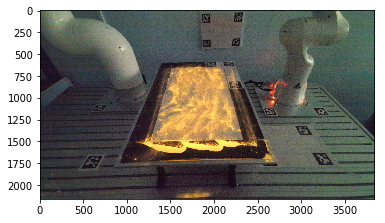

In [49]:
msfl.reset_log()
start_image = kinect.get_image()
plt.imshow(start_image)

# Put obj

# Put obj

# Put obj

# Ligjt ON!

# Ligjt ON!

# Ligjt ON!

In [50]:
mplan.reset_log(False)
gtimer.reset(1, timeunit="s")

with gtimer.block("detect"):
    for sname in pscene.subject_name_list:
        if isinstance(pscene.subject_dict[sname], AbstractObject):
            pscene.remove_subject(sname)
            
    gscene.clear_non_fixed()
    
    ## detect again
    gtem_dict = s_builder.detect_and_register(level_mask=[DetectionLevel.MOVABLE])

    ## create boxes
    box_list =  [] 
    for gname in sorted(gtem_dict.keys()):
        box_new = pscene.create_subject(oname=gname, gname=gname, _type=BoxObject, hexahedral=True)
        box_new.register_binders(pscene, PlacePlane)
        box_list.append(box_new)
    
with gtimer.block("scene_init"):
    clear_tasks(pscene)
    initial_state = pscene.initialize_state(crob.home_pose, force_fit_binding=True)
    gscene.update_markers_all()

    # remove place points and sub-binders except for the current ones
    use_current_place_point_only(pscene, initial_state)
    use_current_sub_binders_only(pscene, initial_state)
    
print(initial_state.node)

gtimer.tic("firstmove")
obj_num = len(gtem_dict)
sweep_num = len(track_list)
current_state = initial_state
t_exe = None
dt_step = 2e-2
snode_schedule_all = []
for sweep_idx in range(3):
    # set current track
    set_single_sweep_line(pscene, sweep_idx, *track_list[sweep_idx])
    # ban current putting on current track's clearance area
    gcheck.put_banned = [track_list[sweep_idx][2]]
    
    tplan.prepare(random_homing=True)
    mplan.update_gscene()
    from_state = pscene.initialize_state(current_state.Q, force_fit_binding=True)
    sweep_goal = (2,)
#     sweep_goal = tuple([int(i_s<=sweep_idx)*2 for i_s in range(2)])+(0,)
    goal_nodes = [("track_face",)*obj_num+sweep_goal]
    if sweep_idx < sweep_num-1:
        for i_s in range(obj_num):
            obj_goal = ["track_face"]*obj_num
            obj_goal[i_s] = "grip1"
            goal_nodes += [tuple(obj_goal)+sweep_goal]
    gtimer.tic("plan{}".format(sweep_idx))
    ppline.search(from_state, goal_nodes, verbose=False, display=False, dt_vis=0.01, 
                  timeout_loop=300, multiprocess=False, timeout=1, timeout_constrained=2, add_homing=True, post_optimize=False)
    gtimer.toc("plan{}".format(sweep_idx))
    schedules = ppline.tplan.find_schedules(False)
    schedules_sorted = ppline.tplan.sort_schedule(schedules)
    snode_schedule = ppline.tplan.idxSchedule2SnodeScedule(schedules_sorted[0])
    snode_schedule_ori = snode_schedule
    snode_schedule_simple = simplify_schedule(pscene, snode_schedule)
    snode_schedule_safe = calculate_safe_schedule(pscene, snode_schedule_simple, 0.5, 1, dt_step=dt_step)
#     double_sweep_motions(snode_schedule_safe)
    snode_schedule = snode_schedule_safe # no mix
#     snode_schedule = mix_schedule(mplan, snode_schedule_safe) # mix
    current_state = snode_schedule[-1].state
    if t_exe:
#         t_exe.join()
        pass
    else:
        gtimer.toc("firstmove")
    t_exe = True
#     t_exe = Thread(target=ppline.execute_schedule, args = (snode_schedule,), kwargs=dict(auto_stop=False, mode_switcher=ModeSwitcher(pscene)))
#     t_exe.start()
    ppline.execute_schedule(snode_schedule,auto_stop=False, mode_switcher=msfl)
    snode_schedule_all.append(snode_schedule)
# t_exe.join()
crob.stop_tracking()

('track_face', 'track_face', 'track_face')
transition motion tried: False
transition motion tried: False
transition motion tried: False
transition motion tried: False
++ adding return motion to acquired answer ++
======================= terminated 0: first answer acquired ===============================
binder: track_face
rname: None
binder: grip1
rname: panda1
binder: track_face
rname: None
binder: None
Connect: Server IP (192.168.0.63)
binder: track_face
rname: None
binder: grip1
rname: panda1
binder: track_face
rname: None
binder: None
Connect: Server IP (192.168.0.63)
binder: track_face
rname: None
binder: track_face
rname: None
binder: track_face
rname: None
binder: None
Connect: Server IP (192.168.0.63)
binder: track_face
rname: None
binder: track_face
rname: None
binder: track_face
rname: None
binder: None
Connect: Server IP (192.168.0.63)
binder: track_face
rname: None
binder: track_face
rname: None
binder: grip1
rname: panda1
binder: None
Connect: Server IP (192.168.0.63)
bind

# renove obj

# renove obj

# renove obj

# renove obj

## get end image

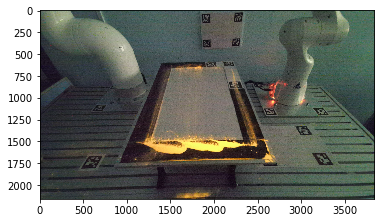

In [51]:
end_image = kinect.get_image()
plt.imshow(end_image)

## log data

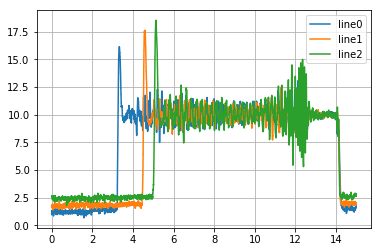

In [52]:
linenames = []
for i_l, Flist in enumerate(msfl.get_log()):
    plt.plot(np.arange(len(Flist))/2e3,Flist[:,2])
    linenames.append("line{}".format(i_l))
plt.legend(linenames)
plt.grid()
force_log_list.append(msfl.get_log())
imageset_list.append((start_image, end_image))

In [53]:
len(force_log_list), len(imageset_list)

(10, 10)

In [54]:
# save_pickle("force_log_list.pkl", force_log_list)
# save_pickle("imageset_list.pkl", imageset_list)

### data proc

In [2]:
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))
from pkg.utils.utils import *
import matplotlib.pyplot as plt

In [4]:
force_log_list_load = load_pickle("data/force_log_list.pkl")
imageset_list_load = load_pickle("data/imageset_list.pkl")

In [5]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

Text(0.5,0,'Time (s)')

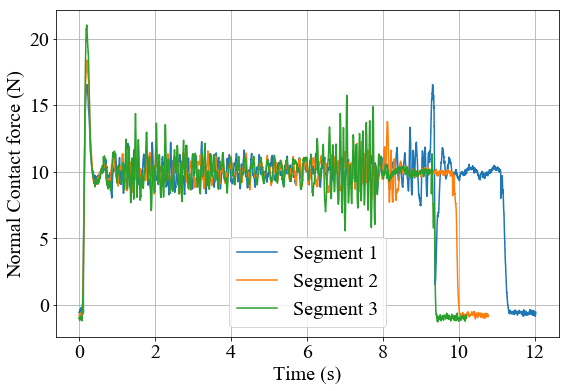

In [6]:
plt.figure(figsize=(9,6))
linenames = []
Fline = {0:[], 1:[], 2:[]}
forcelog = force_log_list_load[0]
for i_l2, Flist in enumerate(forcelog):
    Flist = Flist[:, 2]
    idx_start = np.argmax(Flist[:len(Flist)/2])-int(2e3/5)
    Flist = Flist[idx_start:]
    plt.plot(np.arange(len(Flist))/2e3,Flist)
    linenames.append("Segment {}".format(i_l2+1))        
plt.legend(linenames)
plt.grid()
plt.ylabel("Normal Contact force (N)")
plt.xlabel("Time (s)")

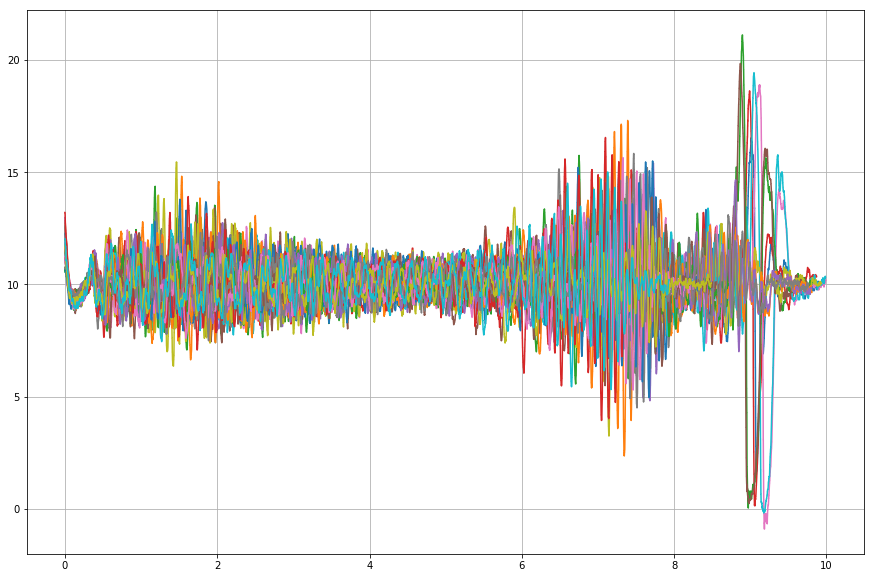

In [252]:
plt.figure(figsize=(15,10))
linenames = []
Fline = {0:[], 1:[], 2:[]}
for i_l1, forcelog in enumerate(force_log_list_load):
    for i_l2, Flist in enumerate(forcelog):
        Flist = Flist[:, 2]
        idx_start = np.argmax(Flist[:len(Flist)/2])+int(2e3/10)
        idx_end = int(2e3)-np.where(Flist[-int(2e3):]<5)[0][0]+int(2e3)
        Flist = Flist[idx_start:-idx_end]
        plt.plot(np.arange(len(Flist))/2e3,Flist)
        linenames.append("line_{}_{}".format(i_l1, i_l2))        
        Fline[i_l2].append(Flist)
# plt.legend(linenames)
plt.grid()

In [253]:
Fline[il]

[array([12.005965, 12.005974, 11.966604, ...,  9.962552,  9.96256 ,
         9.963484]),
 array([12.542509, 12.483449, 12.483459, ...,  9.990471,  9.990484,
        10.050681]),
 array([12.734278, 12.71489 , 12.714887, ...,  9.615202,  9.615208,
         9.615013]),
 array([12.833722, 12.793749, 12.793743, ..., 10.024608, 10.024604,
        10.004336]),
 array([12.980456, 12.88097 , 12.880972, ...,  9.666958,  9.646916,
         9.646927]),
 array([12.604541, 12.505976, 12.505979, ..., 10.183109, 10.183121,
        10.183289]),
 array([10.742277, 10.740093, 10.740107, ..., 10.034977, 10.034981,
        10.034741]),
 array([13.208112, 13.208107, 13.127157, ...,  9.691105,  9.751388,
         9.751388]),
 array([11.910387, 11.79094 , 11.790945, ...,  9.827809,  9.827811,
         9.807711]),
 array([12.026634, 11.947157, 11.947162, ..., 10.221012, 10.220726,
        10.220728])]

In [254]:
for il in range(3):
    Flinei = np.concatenate(Fline[il])
    print("F line {}: {}".format(il, (np.min(Flinei), np.mean(Flinei), np.max(Flinei))))

F line 0: (-0.895705, 10.081226520723074, 21.116305)
F line 1: (6.356366, 10.064496937025194, 15.103365)
F line 2: (2.360607, 10.063619244758103, 17.305797)


In [21]:
imset = imageset_list_load[2]

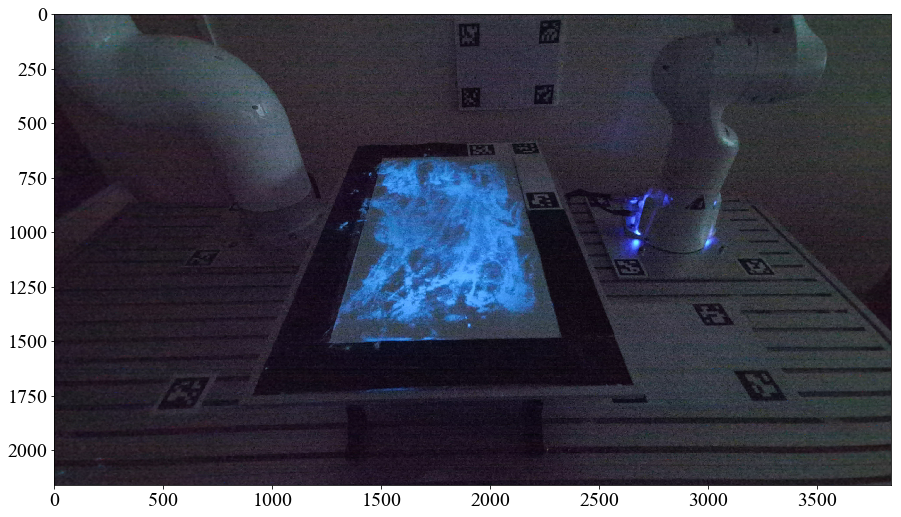

In [24]:
plt.figure(figsize=(15,10))
plt.imshow(imset[0][:,:,[2,1,0]])

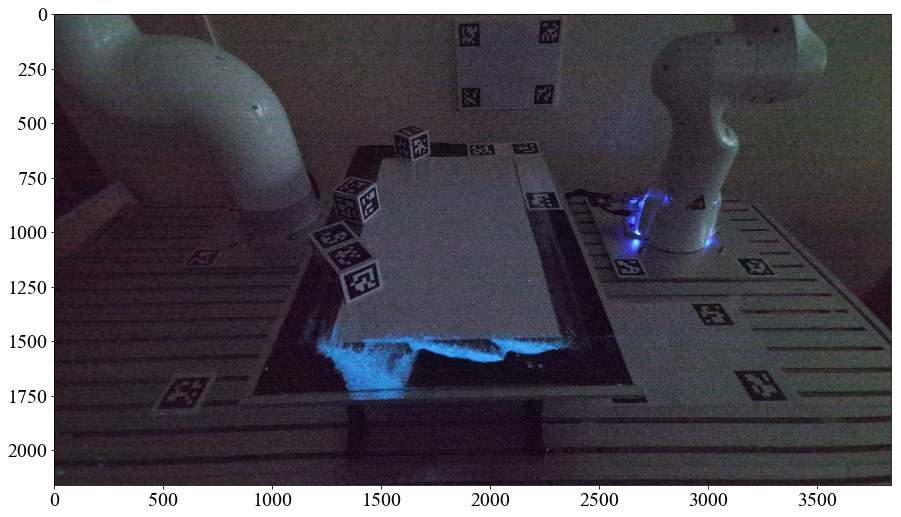

In [25]:
plt.figure(figsize=(15,10))
plt.imshow(imset[1][:,:,[2,1,0]])

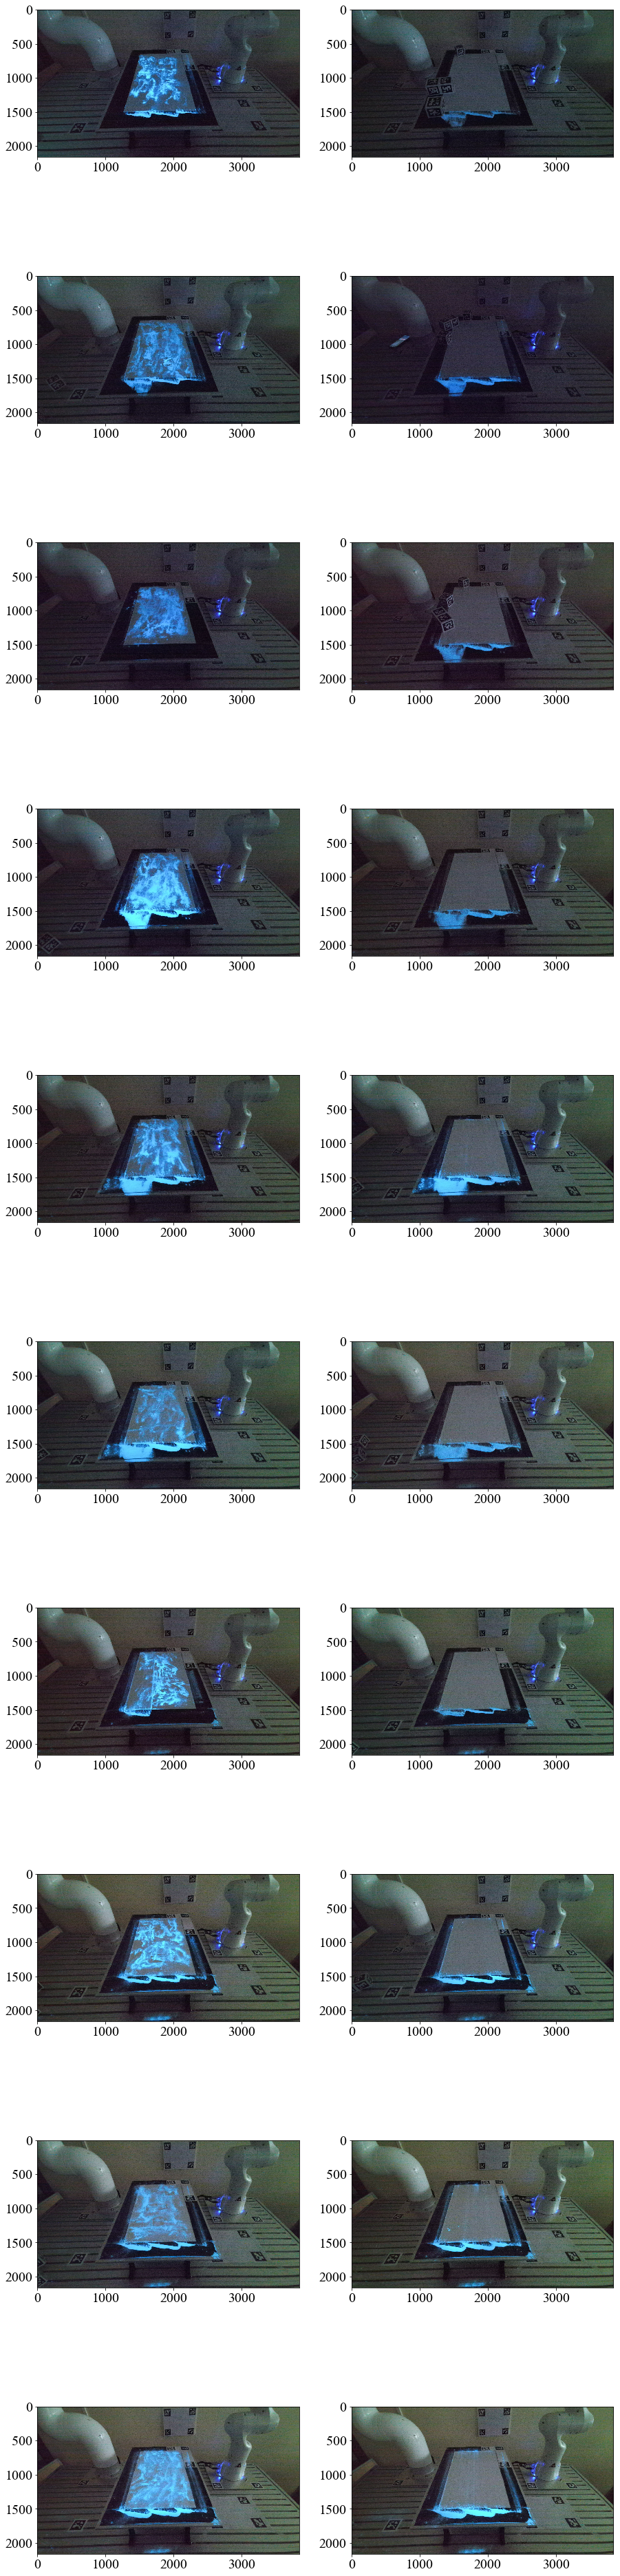

In [20]:
plt.figure(figsize=(15,70))
N_dat = len(imageset_list_load)
for i_is, imset in enumerate(imageset_list_load):
    plt.subplot(N_dat,2,i_is*2+1)
    plt.imshow(imset[0][:,:,[2,1,0]])
    plt.subplot(N_dat,2,i_is*2+2)
    plt.imshow(imset[1][:,:,[2,1,0]])

In [12]:
import cv2
import numpy as np

In [13]:
img = np.zeros((2160, 3840,3), np.uint8)
pts = np.array([(1500, 650), (2100, 650), (2250, 1450), (1300, 1450)])
isClosed = True
color = (1,1,1)
thickness = 10
pts = pts.reshape((-1, 1, 2))

In [14]:
mask = cv2.fillPoly(img, pts=[pts], color=color)
mask_1 = mask[:,:,0]
mask_idx = np.where(mask[:,:,0])

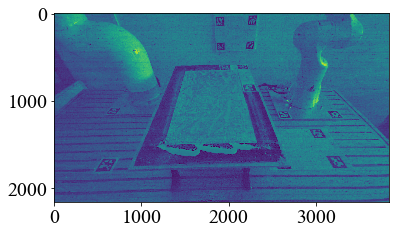

In [18]:
plt.imshow(imset[0][:,:,2])

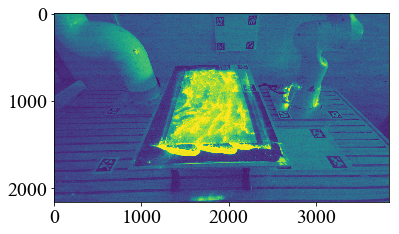

In [19]:
plt.imshow(imset[0][:,:,0])

99.98281545073793
99.93540226922842
99.35186116612958
99.81664640357506
95.03204955754752
99.21687057087459
99.19587145757158
95.01428525989444
95.23892888799615
91.47972637918748


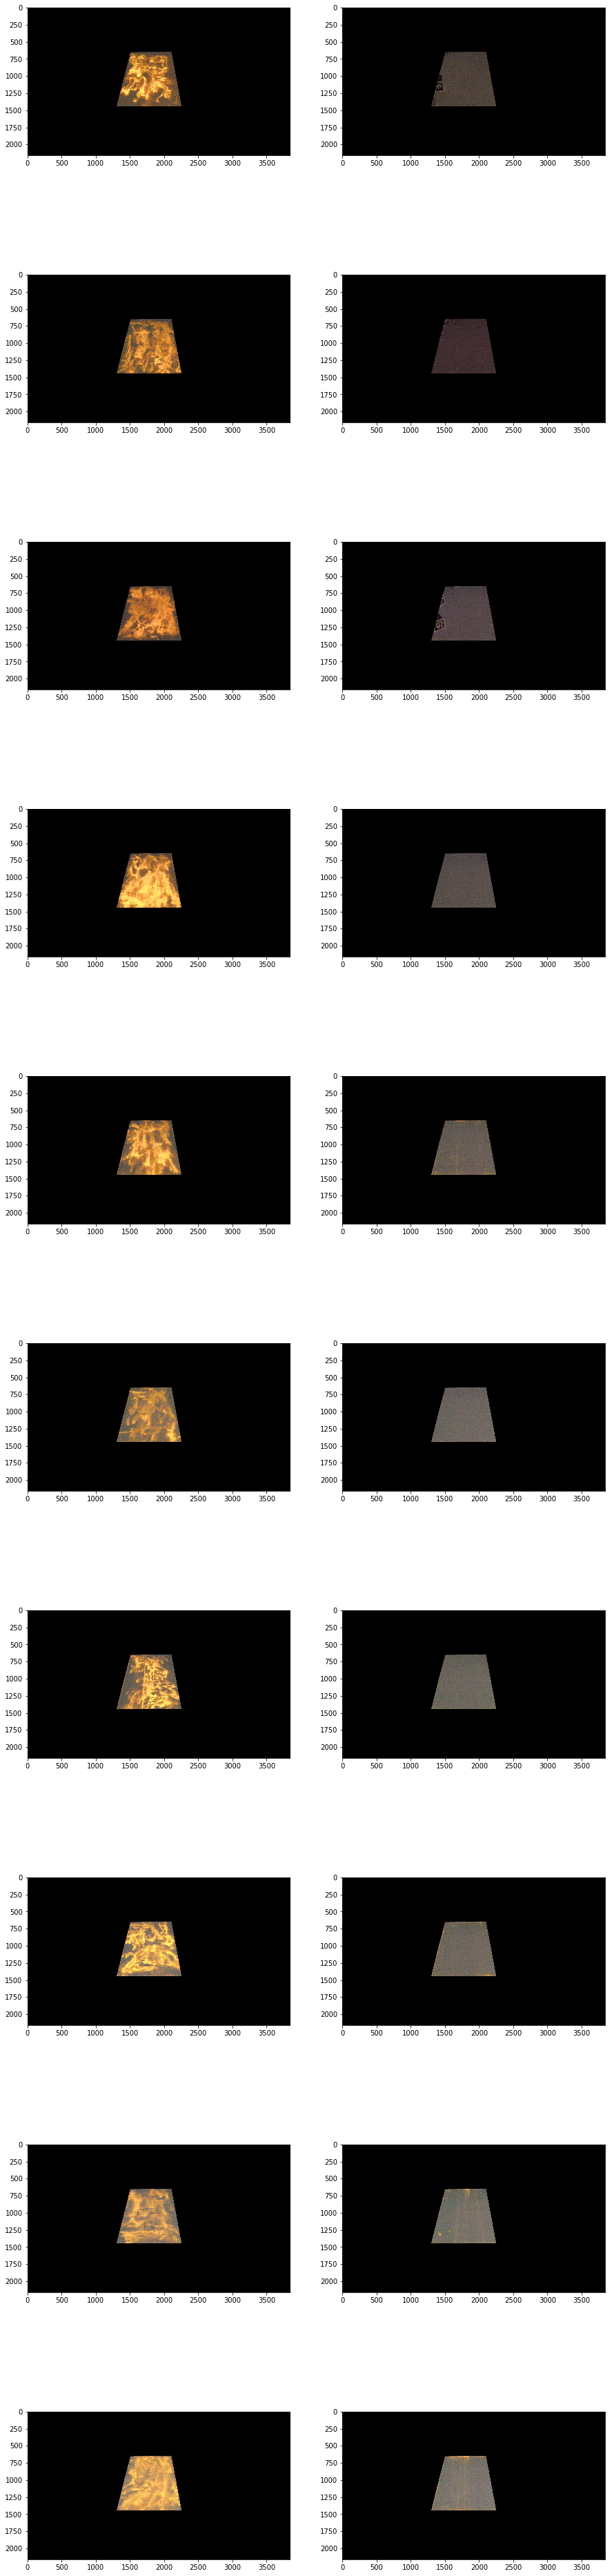

In [201]:
removal_list = []
plt.figure(figsize=(15,70))
N_dat = len(imageset_list_load)
for i_is, imset in enumerate(imageset_list_load):
    img1 = imset[0].astype(np.float)
    diff_im1 = (img1[:,:,0]-img1[:,:,2])
    img2 = imset[1].astype(np.float)
    diff_im2 = (img2[:,:,0]-img2[:,:,2])
    cutoff = np.median(diff_im2[mask_idx])*2
    remain_perc = np.sum(diff_im2[mask_idx]>cutoff).astype(np.float) / np.sum(diff_im1[mask_idx]>cutoff).astype(np.float) * 100
    removal_perc = 100-remain_perc
    removal_list.append(removal_perc)
    print(removal_perc)
    plt.subplot(N_dat,2,i_is*2+1)
    plt.imshow(imset[0]*mask)
    plt.subplot(N_dat,2,i_is*2+2)
    plt.imshow(imset[1]*mask)

In [203]:
np.round((np.min(removal_list), np.mean(removal_list), np.max(removal_list)), 1)

array([ 91.5,  97.4, 100. ])

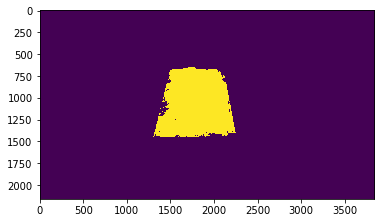

In [188]:
plt.imshow(diff_im1*mask_1>cutoff)

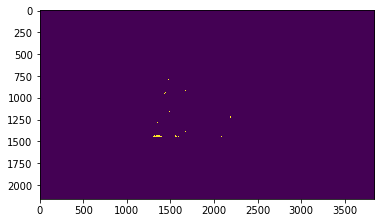

In [189]:
plt.imshow(diff_im2*mask_1>cutoff)

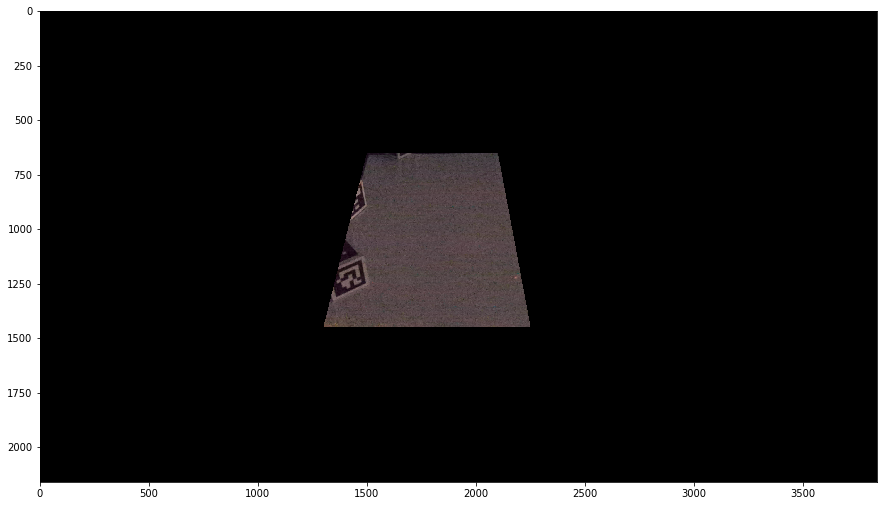

In [190]:
plt.figure(figsize=(15,10))
plt.imshow(imset[1]*mask)